In [2]:
import pandas as pd 
import numpy as np
import seaborn as sn
import sys
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

patient = pd.read_csv("/Users/tedlinghu/Downloads/eICU data/patient.csv")
hospital = pd.read_csv("/Users/tedlinghu/Downloads/eICU data/hospital.csv")
apache_vars = pd.read_csv("/Users/tedlinghu/Downloads/eICU data/apacheApsVar.csv")
cpc = pd.read_csv("/Users/tedlinghu/Downloads/eICU data/carePlanCareProvider.csv")
apache_patient_result = pd.read_csv("/Users/tedlinghu/Downloads/eICU data/apachePatientResult.csv")
treatment = pd.read_csv("/Users/tedlinghu/Downloads/eICU data/treatment.csv")
apache_patient_result = pd.read_csv("/Users/tedlinghu/Downloads/eICU data/apachePatientResult.csv")

In [3]:
south_patient = pd.read_csv("/Users/tedlinghu/Desktop/Luo_Rotation/luorotation/data/south_patient.csv")
west_patient = pd.read_csv("/Users/tedlinghu/Desktop/Luo_Rotation/luorotation/data/west_patient.csv")
midwest_patient = pd.read_csv("/Users/tedlinghu/Desktop/Luo_Rotation/luorotation/data/midwest_patient.csv")
northeast_patient = pd.read_csv("/Users/tedlinghu/Desktop/Luo_Rotation/luorotation/data/northeast_patient.csv")

In [4]:
def patient_intersections(df_you_want, df_to_intersect):
    return df_you_want[df_you_want.patientunitstayid.isin(df_to_intersect.patientunitstayid)]



In [5]:
#finding apache variables for patients from hospitals in their respective regions
south_patient_apache = patient_intersections(apache_patient_result, south_patient)
west_patient_apache = patient_intersections(apache_patient_result, west_patient)

northeast_patient_apache = patient_intersections(apache_patient_result, northeast_patient)
midwest_patient_apache = patient_intersections(apache_patient_result, midwest_patient)




In [6]:
#have to perform double intersection of these two datasets to get the exact same patients

#first intersection
apache_cols = ["patientunitstayid","respiratoryrate", "sodium", "heartrate", "meanbp" ]
patient_cols = ["patientunitstayid", "gender", "age", "ethnicity", "admissionweight" ,"admissionheight"]

south_patient_needed_vars = south_patient[patient_cols]

intersect_apache_patient = patient_intersections(apache_vars, south_patient_needed_vars)

In [7]:
intersect_apache_patient = intersect_apache_patient[apache_cols]

In [8]:
south_patient_needed_vars.shape

(56665, 6)

In [9]:
intersect_apache_patient.shape

(50945, 5)

In [10]:
#finding all patients that were in the intersect dataset back in the south patient datset
intersect_patient_apache = patient_intersections(south_patient_needed_vars, intersect_apache_patient)

In [11]:
intersect_patient_apache.shape

(50945, 6)

In [12]:
intersect_apache_patient.reset_index(drop=True, inplace=True)

In [13]:
#apache variables
intersect_apache_patient

,patientunitstayid,respiratoryrate,sodium,heartrate,meanbp
0,309640,16.0,-1.0,45,64.0
1,309646,18.0,-1.0,105,44.0
2,309754,10.0,140.0,39,45.0
3,309852,12.0,-1.0,60,115.0
4,309873,8.0,-1.0,35,61.0
...,...,...,...,...,...
50940,3353235,50.0,-1.0,106,120.0
50941,3353237,42.0,140.0,112,125.0
50942,3353251,34.0,142.0,104,58.0
50943,3353254,31.0,-1.0,83,60.0


In [14]:
#patient variables

intersect_patient_apache

,patientunitstayid,gender,age,ethnicity,admissionweight,admissionheight
1,309640,Female,54,Caucasian,127.00,166.4
2,309646,Female,74,Caucasian,69.40,152.4
3,309754,Female,62,Caucasian,85.70,162.6
4,309852,Female,55,Caucasian,56.60,162.2
5,309873,Male,59,Caucasian,97.97,182.9
...,...,...,...,...,...,...
56660,3353235,Male,50,Caucasian,90.00,175.3
56661,3353237,Female,79,Caucasian,78.40,162.6
56662,3353251,Male,73,African American,102.00,177.8
56663,3353254,Male,81,Caucasian,83.90,185.4


In [15]:
#merging the final dataset
final = pd.merge(intersect_patient_apache, intersect_apache_patient, on = 'patientunitstayid')

In [16]:
final.shape

(50945, 10)

In [17]:
final.columns

Index(['patientunitstayid', 'gender', 'age', 'ethnicity', 'admissionweight',
       'admissionheight', 'respiratoryrate', 'sodium', 'heartrate', 'meanbp'],
      dtype='object')

In [18]:
def na_removal(df):
    print("##################################")
    print("NA before")
    print("##################################")
    print(df.isnull().sum())   
    df = df.dropna()
    print("##################################")
    print("NA after")
    print("##################################")
    print(df.isnull().sum())
    return df

In [19]:
final = na_removal(final)

##################################
NA before
##################################
patientunitstayid       0
gender                 27
age                    25
ethnicity            1213
admissionweight      1752
admissionheight      1156
respiratoryrate         0
sodium                  0
heartrate               0
meanbp                  0
dtype: int64
##################################
NA after
##################################
patientunitstayid    0
gender               0
age                  0
ethnicity            0
admissionweight      0
admissionheight      0
respiratoryrate      0
sodium               0
heartrate            0
meanbp               0
dtype: int64


In [20]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47762 entries, 0 to 50944
Data columns (total 10 columns):
patientunitstayid    47762 non-null int64
gender               47762 non-null object
age                  47762 non-null object
ethnicity            47762 non-null object
admissionweight      47762 non-null float64
admissionheight      47762 non-null float64
respiratoryrate      47762 non-null float64
sodium               47762 non-null float64
heartrate            47762 non-null int64
meanbp               47762 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 4.0+ MB


In [21]:
final["age"].unique()

array(['54', '74', '62', '55', '59', '76', '70', '> 89', '43', '41', '85',
       '50', '67', '84', '86', '75', '72', '49', '53', '61', '32', '58',
       '57', '60', '56', '71', '88', '66', '65', '80', '52', '81', '31',
       '40', '51', '47', '83', '29', '73', '63', '42', '27', '16', '64',
       '78', '82', '69', '48', '77', '87', '68', '89', '35', '38', '33',
       '79', '45', '46', '25', '36', '44', '22', '37', '24', '39', '21',
       '30', '23', '26', '18', '20', '34', '28', '0', '19', '17', '14',
       '12', '15', '13', '8', '11'], dtype=object)

In [22]:
#converting age to an integer
final["age"].replace({"> 89":"89"}, inplace=True)

final["age"].unique()

final["age"] =final["age"].astype(int)

array(['54', '74', '62', '55', '59', '76', '70', '89', '43', '41', '85',
       '50', '67', '84', '86', '75', '72', '49', '53', '61', '32', '58',
       '57', '60', '56', '71', '88', '66', '65', '80', '52', '81', '31',
       '40', '51', '47', '83', '29', '73', '63', '42', '27', '16', '64',
       '78', '82', '69', '48', '77', '87', '68', '35', '38', '33', '79',
       '45', '46', '25', '36', '44', '22', '37', '24', '39', '21', '30',
       '23', '26', '18', '20', '34', '28', '0', '19', '17', '14', '12',
       '15', '13', '8', '11'], dtype=object)

In [23]:
final["age"] =final["age"].astype(int)

In [24]:
#one hot encoding
final = pd.get_dummies(final)

In [25]:
#It seems like a lot of the data is =-1 which I feel like might actually be missing values so I'm going to drop it
len(final.loc[final["sodium"] == -1])

11280

In [26]:
len(final.loc[final["heartrate"] == -1])

384

In [27]:
len(final.loc[final["meanbp"] == -1])

525

In [28]:
def remove_neg_ones(df):
    for i in df.columns:
        if np.min(df[i]) == -1.0:
            df = df.drop(df.loc[df[i] == -1].index)
    return df

In [29]:
final.shape

(47762, 18)

In [30]:
final = remove_neg_ones(final)

In [31]:
final.shape

(36251, 18)

In [32]:
final["patientunitstayid"]

2         309754
5         309887
6         309891
7         309892
8         309917
          ...   
50935    3353200
50937    3353213
50938    3353216
50941    3353237
50942    3353251
Name: patientunitstayid, Length: 36251, dtype: int64

In [33]:
#getting the index to the labels
idx = apache_patient_result[apache_patient_result.patientunitstayid.isin(final["patientunitstayid"])]["patientunitstayid"].drop_duplicates().index

In [34]:
apache_patient_labels = apache_patient_result.loc[idx]

In [35]:
icu_mort = apache_patient_labels['actualicumortality']
hosp_mort = apache_patient_labels['actualhospitalmortality']

icu_los = apache_patient_labels['actualiculos']
hosp_los = apache_patient_labels['actualhospitallos']

In [36]:
len(icu_mort)

34601

In [37]:
final = final[final.patientunitstayid.isin(apache_patient_result.loc[idx]['patientunitstayid'])]

In [38]:
final.shape

(34601, 18)

In [39]:
icu_mort.index

Int64Index([ 25780,  25786,  25788,  25790,  25792,  25794,  25796,  25798,
             25802,  25804,
            ...
            297034, 297036, 297038, 297040, 297042, 297044, 297048, 297050,
            297056, 297058],
           dtype='int64', length=34601)

In [40]:
icu_mort.reset_index(drop=True, inplace=True)

In [41]:
final_patient_id = final['patientunitstayid']

In [42]:
#removing patient id because it adds no predictive value
final = final.drop("patientunitstayid", axis = 1)

In [43]:
final.head()

,age,admissionweight,admissionheight,respiratoryrate,sodium,heartrate,meanbp,gender_Female,gender_Male,gender_Other,gender_Unknown,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown
2,62,85.7,162.6,10.0,140.0,39,45.0,1,0,0,0,0,0,1,0,0,0
5,76,112.4,175.3,12.0,137.0,121,112.0,0,1,0,0,0,0,1,0,0,0
6,70,82.3,166.4,18.0,133.0,91,156.0,1,0,0,0,1,0,0,0,0,0
7,70,164.0,166.4,15.0,136.0,59,103.0,1,0,0,0,1,0,0,0,0,0
8,89,81.6,182.9,29.0,146.0,103,50.0,0,1,0,0,0,0,1,0,0,0


In [44]:
final.shape

(34601, 17)

In [45]:
icu_mort.value_counts()

ALIVE      32475
EXPIRED     2126
Name: actualicumortality, dtype: int64

In [46]:
#extremely unbalanced class
2126/(32474+2126)

0.06144508670520231

In [47]:
32474-2126

30348

In [48]:
final

,age,admissionweight,admissionheight,respiratoryrate,sodium,heartrate,meanbp,gender_Female,gender_Male,gender_Other,gender_Unknown,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown
2,62,85.7,162.6,10.0,140.0,39,45.0,1,0,0,0,0,0,1,0,0,0
5,76,112.4,175.3,12.0,137.0,121,112.0,0,1,0,0,0,0,1,0,0,0
6,70,82.3,166.4,18.0,133.0,91,156.0,1,0,0,0,1,0,0,0,0,0
7,70,164.0,166.4,15.0,136.0,59,103.0,1,0,0,0,1,0,0,0,0,0
8,89,81.6,182.9,29.0,146.0,103,50.0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50935,66,71.5,157.5,30.0,134.0,112,64.0,1,0,0,0,0,0,1,0,0,0
50937,51,54.4,160.0,45.0,142.0,107,116.0,1,0,0,0,0,0,1,0,0,0
50938,50,55.4,165.1,14.0,143.0,62,114.0,1,0,0,0,1,0,0,0,0,0
50941,79,78.4,162.6,42.0,140.0,112,125.0,1,0,0,0,0,0,1,0,0,0


In [49]:
final.reset_index(drop=True, inplace = True)

In [50]:
final

,age,admissionweight,admissionheight,respiratoryrate,sodium,heartrate,meanbp,gender_Female,gender_Male,gender_Other,gender_Unknown,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown
0,62,85.7,162.6,10.0,140.0,39,45.0,1,0,0,0,0,0,1,0,0,0
1,76,112.4,175.3,12.0,137.0,121,112.0,0,1,0,0,0,0,1,0,0,0
2,70,82.3,166.4,18.0,133.0,91,156.0,1,0,0,0,1,0,0,0,0,0
3,70,164.0,166.4,15.0,136.0,59,103.0,1,0,0,0,1,0,0,0,0,0
4,89,81.6,182.9,29.0,146.0,103,50.0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34596,66,71.5,157.5,30.0,134.0,112,64.0,1,0,0,0,0,0,1,0,0,0
34597,51,54.4,160.0,45.0,142.0,107,116.0,1,0,0,0,0,0,1,0,0,0
34598,50,55.4,165.1,14.0,143.0,62,114.0,1,0,0,0,1,0,0,0,0,0
34599,79,78.4,162.6,42.0,140.0,112,125.0,1,0,0,0,0,0,1,0,0,0


In [51]:
final["label"] = icu_mort

In [52]:
final

,age,admissionweight,admissionheight,respiratoryrate,sodium,heartrate,meanbp,gender_Female,gender_Male,gender_Other,gender_Unknown,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,label
0,62,85.7,162.6,10.0,140.0,39,45.0,1,0,0,0,0,0,1,0,0,0,ALIVE
1,76,112.4,175.3,12.0,137.0,121,112.0,0,1,0,0,0,0,1,0,0,0,ALIVE
2,70,82.3,166.4,18.0,133.0,91,156.0,1,0,0,0,1,0,0,0,0,0,ALIVE
3,70,164.0,166.4,15.0,136.0,59,103.0,1,0,0,0,1,0,0,0,0,0,ALIVE
4,89,81.6,182.9,29.0,146.0,103,50.0,0,1,0,0,0,0,1,0,0,0,ALIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34596,66,71.5,157.5,30.0,134.0,112,64.0,1,0,0,0,0,0,1,0,0,0,ALIVE
34597,51,54.4,160.0,45.0,142.0,107,116.0,1,0,0,0,0,0,1,0,0,0,ALIVE
34598,50,55.4,165.1,14.0,143.0,62,114.0,1,0,0,0,1,0,0,0,0,0,ALIVE
34599,79,78.4,162.6,42.0,140.0,112,125.0,1,0,0,0,0,0,1,0,0,0,ALIVE


In [53]:
final.to_csv("/Users/tedlinghu/Desktop/Luo_Rotation/luorotation/final.csv", header = True)

In [74]:
#because it is so unbalanced I have to downsample first

from sklearn.utils import resample

#upsampling

alive = final.loc[final["label"] == "ALIVE"]
expired = final.loc[final["label"] == "EXPIRED"]

downsample = resample(alive, n_samples = 2126, random_state = 42)

downsampled = pd.concat([expired, downsample])

downsampled["label"].value_counts()

In [75]:
upsample = resample(expired, replace = True, n_samples = 32475, random_state = 123)

upsampled = pd.concat([alive, upsample])

upsampled["label"].value_counts()

EXPIRED    32475
ALIVE      32475
Name: label, dtype: int64

In [76]:
downsample = resample(alive, n_samples = 2126, random_state = 42)

downsampled = pd.concat([expired, downsample])

downsampled["label"].value_counts()

ALIVE      2126
EXPIRED    2126
Name: label, dtype: int64

In [77]:
downsampled.reset_index(drop=True, inplace=True)

In [78]:
upsampled.reset_index(drop=True, inplace=True)

In [79]:
upsampled_label = upsampled['label']
upsampled = upsampled.drop('label', axis = 1)

In [80]:
downsampled_label = downsampled['label']
downsampled = downsampled.drop('label', axis = 1)

In [81]:
import numpy as np
import math

def create_interaction_df(df):
    mult_df = pd.DataFrame()
    div_df = pd.DataFrame()
    for i in df.columns[:]:
        for j in df.columns[:]:
            mult_df[i+" and "+j] = df[i] * df[j]
            if(np.isnan(df[i]/df[j]).any() or np.isposinf(df[i]/df[j])).any() or np.isneginf(df[i]/df[j]).any():
                pass
            else:
                div_df[i+" and "+j] = df[i] / df[j]
    return mult_df, div_df

In [82]:
mult_upsampled, div_upsampled = create_interaction_df(upsampled)

In [83]:
mult_upsampled.shape

(64950, 289)

In [84]:
div_upsampled.shape

(64950, 68)

In [85]:
mult_downsampled, div_downsampled = create_interaction_df(downsampled)

In [86]:
mult_downsampled.shape

(4252, 289)

In [87]:
div_downsampled.shape

(4252, 85)

In [88]:
upsampled['label'] = upsampled_label
mult_upsampled['label'] = upsampled_label
div_upsampled['label'] = upsampled_label

In [89]:
downsampled['label'] = downsampled_label
mult_downsampled['label'] = downsampled_label
div_downsampled['label'] = downsampled_label

In [91]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
    
all_data = [upsampled, mult_upsampled, div_upsampled, downsampled, mult_downsampled, div_downsampled]
names = ["upsampled" , "mult_upsampled", "div_upsampled", "downsampled", "mult_downsampled", "div_downsampled"]
type_of_data = ["training", "testing"]

training_dict = dict()
testing_dict = dict()
training_labels = dict()
testing_labels = dict()


for d in range(len(all_data)):
    for train_idx, test_idx in split.split(all_data[d], all_data[d]['label']):
        training_dict[names[d]+"_"+type_of_data[0]] = all_data[d].loc[train_idx]
        training_labels[names[d]+"_"+type_of_data[0]] = all_data[d].loc[train_idx]['label']
        
        testing_dict[names[d]+"_"+type_of_data[1]] = all_data[d].loc[test_idx]
        testing_labels[names[d]+"_"+type_of_data[1]] = all_data[d].loc[test_idx]['label']


In [96]:
for i in training_dict:
    training_dict[i].to_csv("/Users/tedlinghu/Desktop/Luo_Rotation/luorotation/training_data/" + "apache_patient_vars_" + i + ".csv")
    training_labels[i].to_csv("/Users/tedlinghu/Desktop/Luo_Rotation/luorotation/training_labels/" + "apache_patient_vars_" + i + "_labels"+ ".csv")

/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [97]:
for i in testing_dict:
    testing_dict[i].to_csv("/Users/tedlinghu/Desktop/Luo_Rotation/luorotation/testing_data/" + "apache_patient_vars_" + i + ".csv")
    testing_labels[i].to_csv("/Users/tedlinghu/Desktop/Luo_Rotation/luorotation/testing_labels/" + "apache_patient_vars_" + i + "_labels"+ ".csv")

/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [92]:
testing_labels

{'upsampled_testing': 34859    EXPIRED
 1742       ALIVE
 28905      ALIVE
 60652    EXPIRED
 10757      ALIVE
           ...   
 2421       ALIVE
 37744    EXPIRED
 50592    EXPIRED
 37733    EXPIRED
 27532      ALIVE
 Name: label, Length: 12990, dtype: object,
 'mult_upsampled_testing': 34859    EXPIRED
 1742       ALIVE
 28905      ALIVE
 60652    EXPIRED
 10757      ALIVE
           ...   
 2421       ALIVE
 37744    EXPIRED
 50592    EXPIRED
 37733    EXPIRED
 27532      ALIVE
 Name: label, Length: 12990, dtype: object,
 'div_upsampled_testing': 34859    EXPIRED
 1742       ALIVE
 28905      ALIVE
 60652    EXPIRED
 10757      ALIVE
           ...   
 2421       ALIVE
 37744    EXPIRED
 50592    EXPIRED
 37733    EXPIRED
 27532      ALIVE
 Name: label, Length: 12990, dtype: object,
 'downsampled_testing': 3888      ALIVE
 454     EXPIRED
 3883      ALIVE
 777     EXPIRED
 1571    EXPIRED
          ...   
 2283      ALIVE
 123     EXPIRED
 1845    EXPIRED
 2989      ALIVE
 2029    

In [93]:
toreplace = {"ALIVE" : 1, "EXPIRED":0 }

for i in training_labels:
    training_labels[i].replace(toreplace, inplace = True)

In [202]:
for j in testing_labels:
    testing_labels[j].replace(toreplace, inplace = True)
    

In [203]:
testing_labels

{'upsampled_testing': 34859    0
 1742     1
 28905    1
 60652    0
 10757    1
         ..
 2421     1
 37744    0
 50592    0
 37733    0
 27532    1
 Name: label, Length: 12990, dtype: int64, 'mult_upsampled_testing': 34859    0
 1742     1
 28905    1
 60652    0
 10757    1
         ..
 2421     1
 37744    0
 50592    0
 37733    0
 27532    1
 Name: label, Length: 12990, dtype: int64, 'div_upsampled_testing': 34859    0
 1742     1
 28905    1
 60652    0
 10757    1
         ..
 2421     1
 37744    0
 50592    0
 37733    0
 27532    1
 Name: label, Length: 12990, dtype: int64, 'downsampled_testing': 3888    1
 454     0
 3883    1
 777     0
 1571    0
        ..
 2283    1
 123     0
 1845    0
 2989    1
 2029    0
 Name: label, Length: 851, dtype: int64, 'mult_downsampled_testing': 3888    1
 454     0
 3883    1
 777     0
 1571    0
        ..
 2283    1
 123     0
 1845    0
 2989    1
 2029    0
 Name: label, Length: 851, dtype: int64, 'div_downsampled_testing': 3888 

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score



lr = LogisticRegression()
lda = LinearDiscriminantAnalysis()
knn = KNeighborsClassifier()
nb = GaussianNB()
svm = SVC()
rf = RandomForestClassifier()


In [207]:
sk_models = [lr, lda, knn, nb, svm, rf]
sk_model_names = ["lr", "lda", "knn", "nb", "svm", "rf"]


acc_dict = dict()
roc_dict = dict()
f1_dict = dict()

for m in range(len(sk_models)):
    for d in training_dict:
        print("m", m)
        print("d", d)
        name = sk_model_names[m] +"_"+ d
        print(name)
        acc = cross_val_score(sk_models[m], training_dict[d], training_labels[d], scoring = 'accuracy', cv = 5)
        roc = cross_val_score(sk_models[m], training_dict[d], training_labels[d], scoring = 'roc_auc', cv = 5)
        f1_cv = cross_val_score(sk_models[m], training_dict[d], training_labels[d], scoring = 'f1', cv = 5)
        acc_dict[name] = acc
        roc_dict[name] = roc
        f1_dict[name] = f1_cv

m 0
d upsampled_training
lr_upsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: 

m 0
d mult_upsampled_training
lr_mult_upsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defa

m 0
d div_upsampled_training
lr_div_upsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: 

m 0
d downsampled_training
lr_downsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: 

m 0
d mult_downsampled_training
lr_mult_downsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: De

m 0
d div_downsampled_training
lr_div_downsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: 

m 1
d upsampled_training
lda_upsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarn

m 1
d mult_upsampled_training
lda_mult_upsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarn

m 1
d div_upsampled_training
lda_div_upsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarn

m 1
d downsampled_training
lda_downsampled_training
m 1
d mult_downsampled_training
lda_mult_downsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarn

m 1
d div_downsampled_training
lda_div_downsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarn

m 2
d upsampled_training
knn_upsampled_training
m 2
d mult_upsampled_training
knn_mult_upsampled_training
m 2
d div_upsampled_training
knn_div_upsampled_training
m 2
d downsampled_training
knn_downsampled_training
m 2
d mult_downsampled_training
knn_mult_downsampled_training
m 2
d div_downsampled_training
knn_div_downsampled_training
m 3
d upsampled_training
nb_upsampled_training
m 3
d mult_upsampled_training
nb_mult_upsampled_training
m 3
d div_upsampled_training
nb_div_upsampled_training
m 3
d downsampled_training
nb_downsampled_training
m 3
d mult_downsampled_training
nb_mult_downsampled_training
m 3
d div_downsampled_training
nb_div_downsampled_training
m 4
d upsampled_training
svm_upsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/

m 4
d mult_upsampled_training
svm_mult_upsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/

m 4
d div_upsampled_training
svm_div_upsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/

m 4
d downsampled_training
svm_downsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/

m 4
d mult_downsampled_training
svm_mult_downsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/

m 4
d div_downsampled_training
svm_div_downsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/

m 5
d upsampled_training
rf_upsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedli

m 5
d mult_upsampled_training
rf_mult_upsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedli

m 5
d div_upsampled_training
rf_div_upsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedli

m 5
d downsampled_training
rf_downsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedli

m 5
d mult_downsampled_training
rf_mult_downsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedli

m 5
d div_downsampled_training
rf_div_downsampled_training


/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tedli

In [208]:
acc_dict


{'lr_upsampled_training': array([0.63308314, 0.62172825, 0.62461509, 0.62788684, 0.6301963 ]),
 'lr_mult_upsampled_training': array([0.6919746 , 0.68292918, 0.67407621, 0.68321786, 0.68841416]),
 'lr_div_upsampled_training': array([0.69563125, 0.68600847, 0.676097  , 0.69264819, 0.69409161]),
 'lr_downsampled_training': array([0.63142438, 0.62205882, 0.63529412, 0.59264706, 0.61470588]),
 'lr_mult_downsampled_training': array([0.66960352, 0.68382353, 0.69264706, 0.65147059, 0.65      ]),
 'lr_div_downsampled_training': array([0.68281938, 0.72205882, 0.71323529, 0.66029412, 0.67794118]),
 'lda_upsampled_training': array([0.63414165, 0.62105466, 0.62442263, 0.62769438, 0.63135104]),
 'lda_mult_upsampled_training': array([0.69601617, 0.68321786, 0.67407621, 0.68629715, 0.6895689 ]),
 'lda_div_upsampled_training': array([0.69688222, 0.68812548, 0.68033102, 0.69168591, 0.70294457]),
 'lda_downsampled_training': array([0.6328928 , 0.63529412, 0.64264706, 0.6       , 0.61029412]),
 'lda_mult_

In [209]:
roc_dict

{'lr_upsampled_training': array([0.68187234, 0.66468292, 0.66677493, 0.67243489, 0.67691912]),
 'lr_mult_upsampled_training': array([0.75255563, 0.74604503, 0.73698198, 0.7458179 , 0.75519338]),
 'lr_div_upsampled_training': array([0.76190496, 0.74799992, 0.74392142, 0.75273668, 0.7616722 ]),
 'lr_downsampled_training': array([0.69800759, 0.68442042, 0.67108131, 0.63224048, 0.66275087]),
 'lr_mult_downsampled_training': array([0.72624633, 0.75301038, 0.7440917 , 0.6833218 , 0.71051038]),
 'lr_div_downsampled_training': array([0.74812834, 0.77338235, 0.76557093, 0.69851211, 0.74277682]),
 'lda_upsampled_training': array([0.68180315, 0.6650475 , 0.6670451 , 0.6724549 , 0.67714269]),
 'lda_mult_upsampled_training': array([0.75557933, 0.74550103, 0.73825109, 0.74636538, 0.75530968]),
 'lda_div_upsampled_training': array([0.76700429, 0.75786461, 0.75280098, 0.76169017, 0.77274111]),
 'lda_downsampled_training': array([0.69616181, 0.68557958, 0.67672145, 0.63568339, 0.66915225]),
 'lda_mult_

In [210]:
f1_dict

{'lr_upsampled_training': array([0.62969797, 0.61971558, 0.62465121, 0.62806579, 0.62959036]),
 'lr_mult_upsampled_training': array([0.6985024 , 0.68970713, 0.67989793, 0.69118199, 0.69516099]),
 'lr_div_upsampled_training': array([0.70480635, 0.69745016, 0.68723286, 0.70343547, 0.70540265]),
 'lr_downsampled_training': array([0.62814815, 0.6226138 , 0.63848397, 0.58345865, 0.59692308]),
 'lr_mult_downsampled_training': array([0.68619247, 0.69589816, 0.70100143, 0.65095729, 0.64477612]),
 'lr_div_downsampled_training': array([0.69832402, 0.73038516, 0.72727273, 0.6676259 , 0.67935578]),
 'lda_upsampled_training': array([0.63051506, 0.61907526, 0.62416948, 0.628231  , 0.63067579]),
 'lda_mult_upsampled_training': array([0.70262638, 0.69135571, 0.68110347, 0.69464219, 0.6970892 ]),
 'lda_div_upsampled_training': array([0.70773798, 0.70021275, 0.691436  , 0.70316843, 0.71376912]),
 'lda_downsampled_training': array([0.62908012, 0.63953488, 0.64421669, 0.58912387, 0.59665145]),
 'lda_mult_

In [213]:
mean_acc = []
mean_roc = []
mean_f1 = []
for i in acc_dict:
    mean_acc.append(acc_dict[i].mean())
    mean_roc.append(roc_dict[i].mean())
    mean_f1.append(f1_dict[i].mean())
    


<function matplotlib.pyplot.show(*args, **kw)>

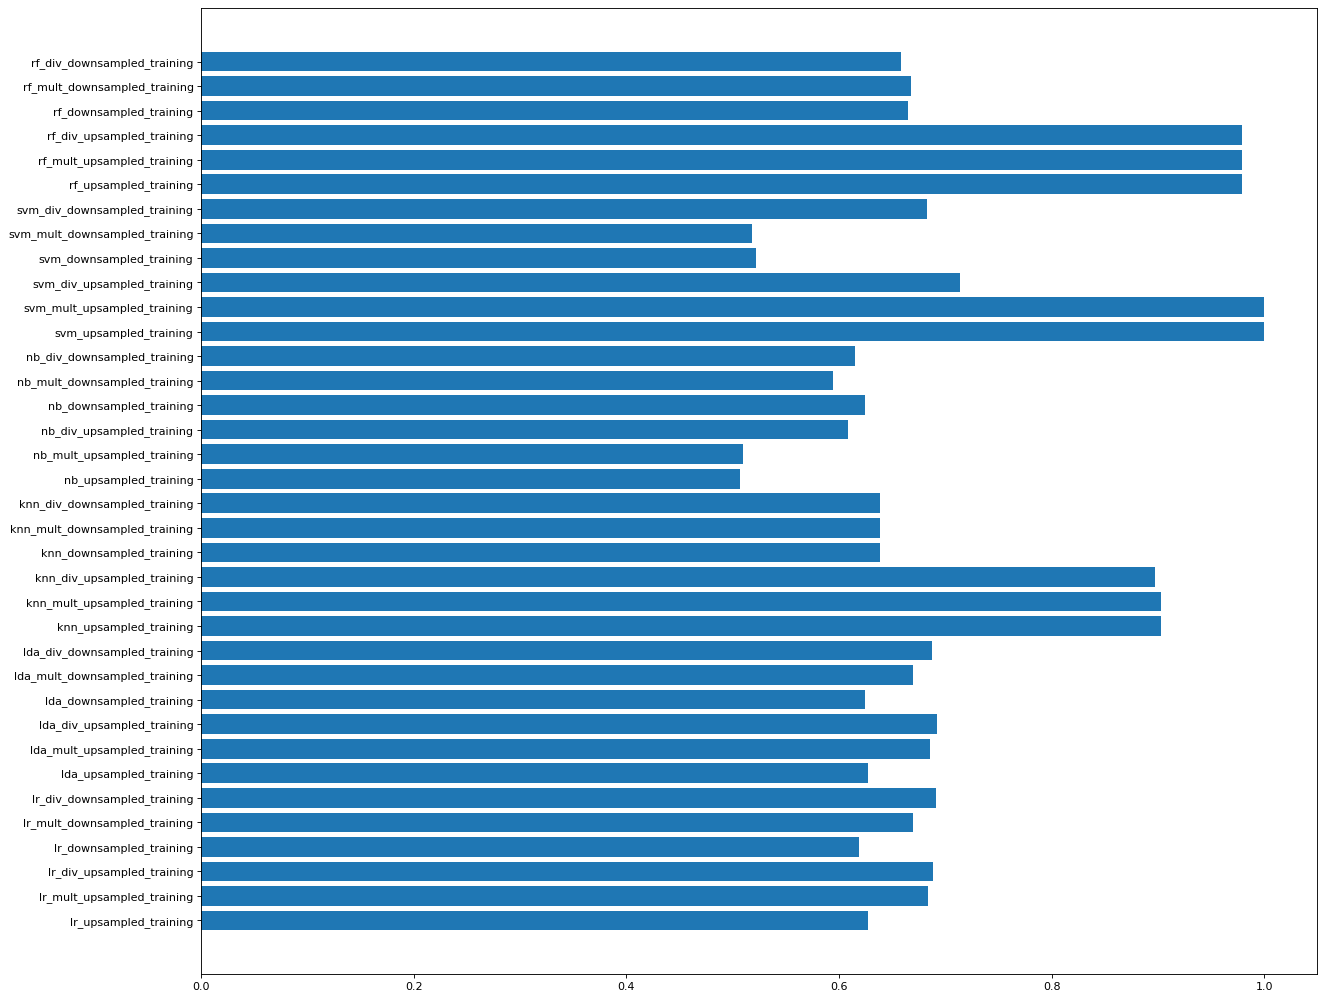

In [228]:
plt.figure(figsize=(18, 16), dpi= 80)
plt.barh(y = range(len(acc_dict.keys())), width = mean_acc)
plt.yticks(range(len(acc_dict.keys())), acc_dict.keys())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

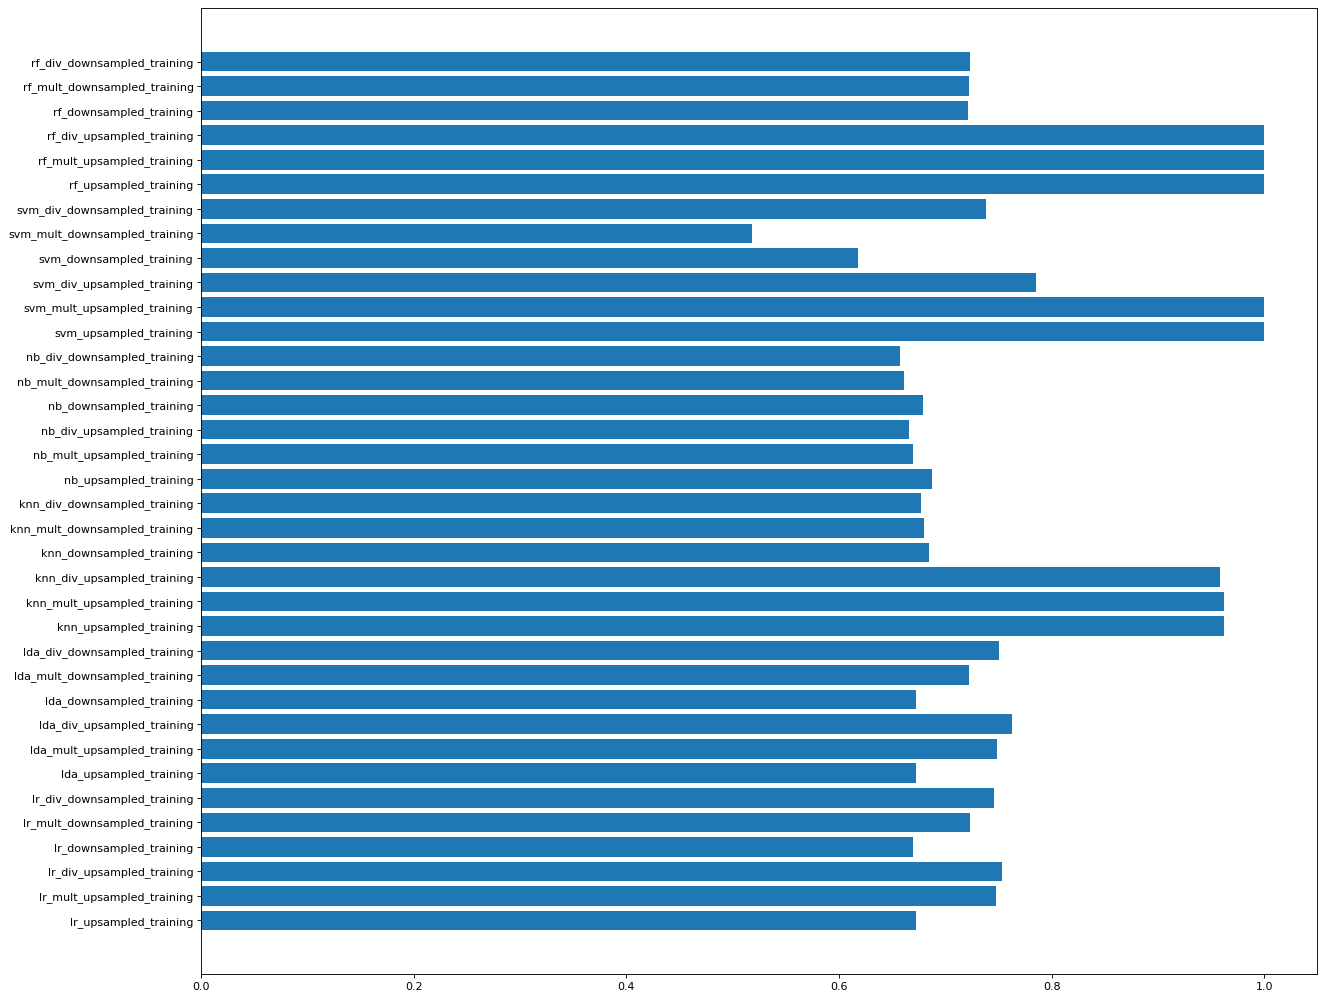

In [229]:
plt.figure(figsize=(18, 16), dpi= 80)
plt.barh(y = range(len(acc_dict.keys())), width = mean_roc)
plt.yticks(range(len(acc_dict.keys())), acc_dict.keys())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

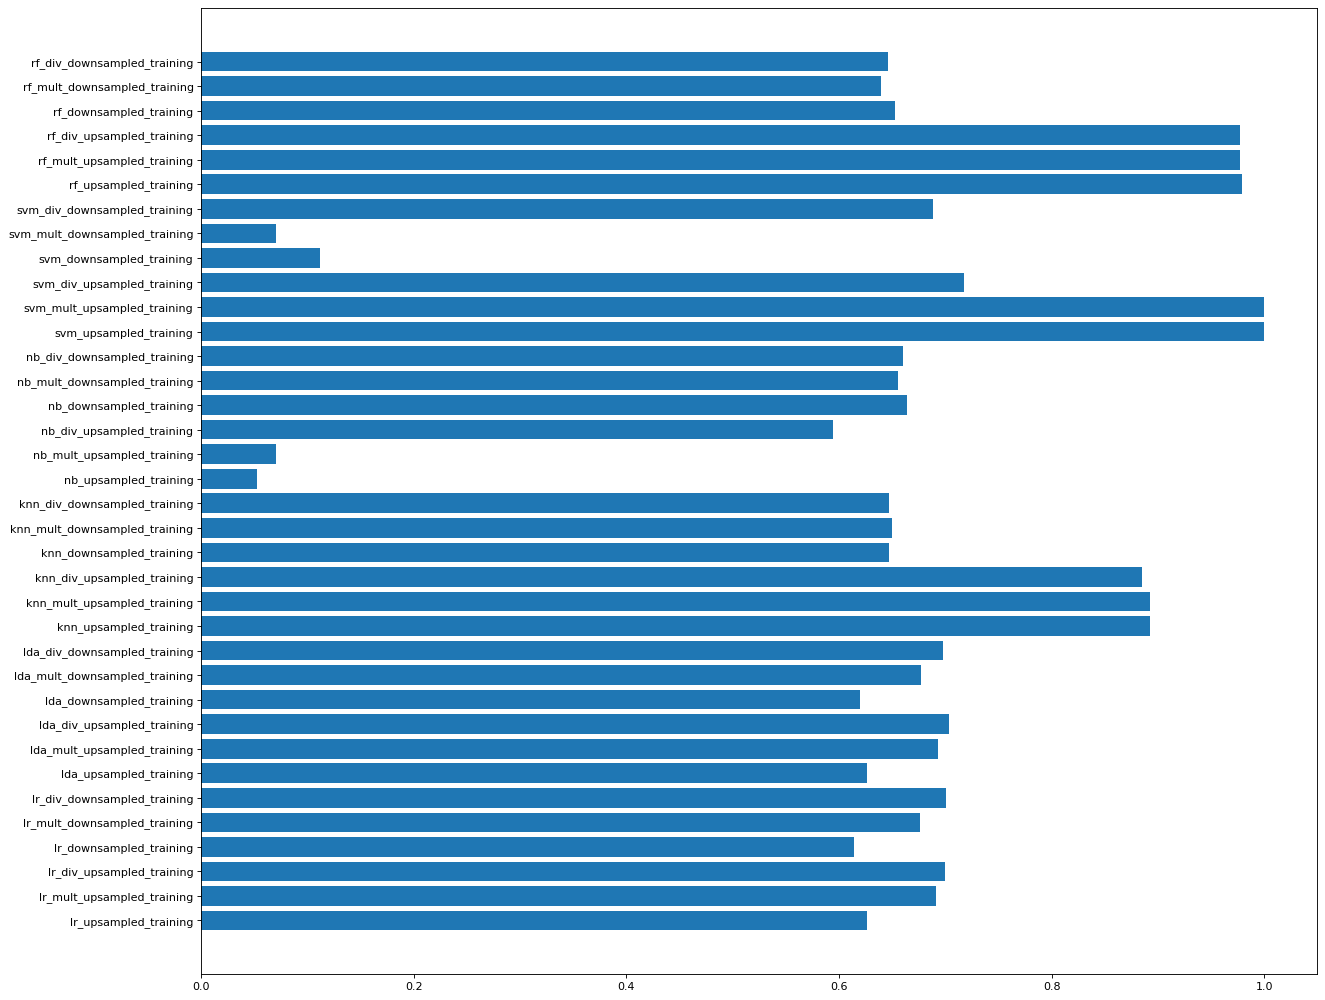

In [230]:
plt.figure(figsize=(18, 16), dpi= 80)
plt.barh(y = range(len(acc_dict.keys())), width = mean_f1)
plt.yticks(range(len(acc_dict.keys())), acc_dict.keys())
plt.show

In [233]:
acc_list_names = list(acc_dict.keys())

In [237]:
upsampled_idx = []
downsampled_idx = []
for i in acc_list_names:
    upsampled_idx.append("upsampled" in i)
    downsampled_idx.append("downsampled" in i)

In [246]:
from itertools import compress
upsampled_names = list(compress(acc_list_names, upsampled_idx))
upsampled_mean_accuracy = list(compress(mean_acc, upsampled_idx))
upsampled_mean_roc = list(compress(mean_roc, upsampled_idx))
upsampled_mean_f1 = list(compress(mean_f1, upsampled_idx))



In [247]:
downsampled_names = list(compress(acc_list_names, downsampled_idx))
downsampled_mean_accuracy = list(compress(mean_acc, downsampled_idx))
downsampled_mean_roc = list(compress(mean_roc, downsampled_idx))
downsampled_mean_f1 = list(compress(mean_f1, downsampled_idx))



<function matplotlib.pyplot.show(*args, **kw)>

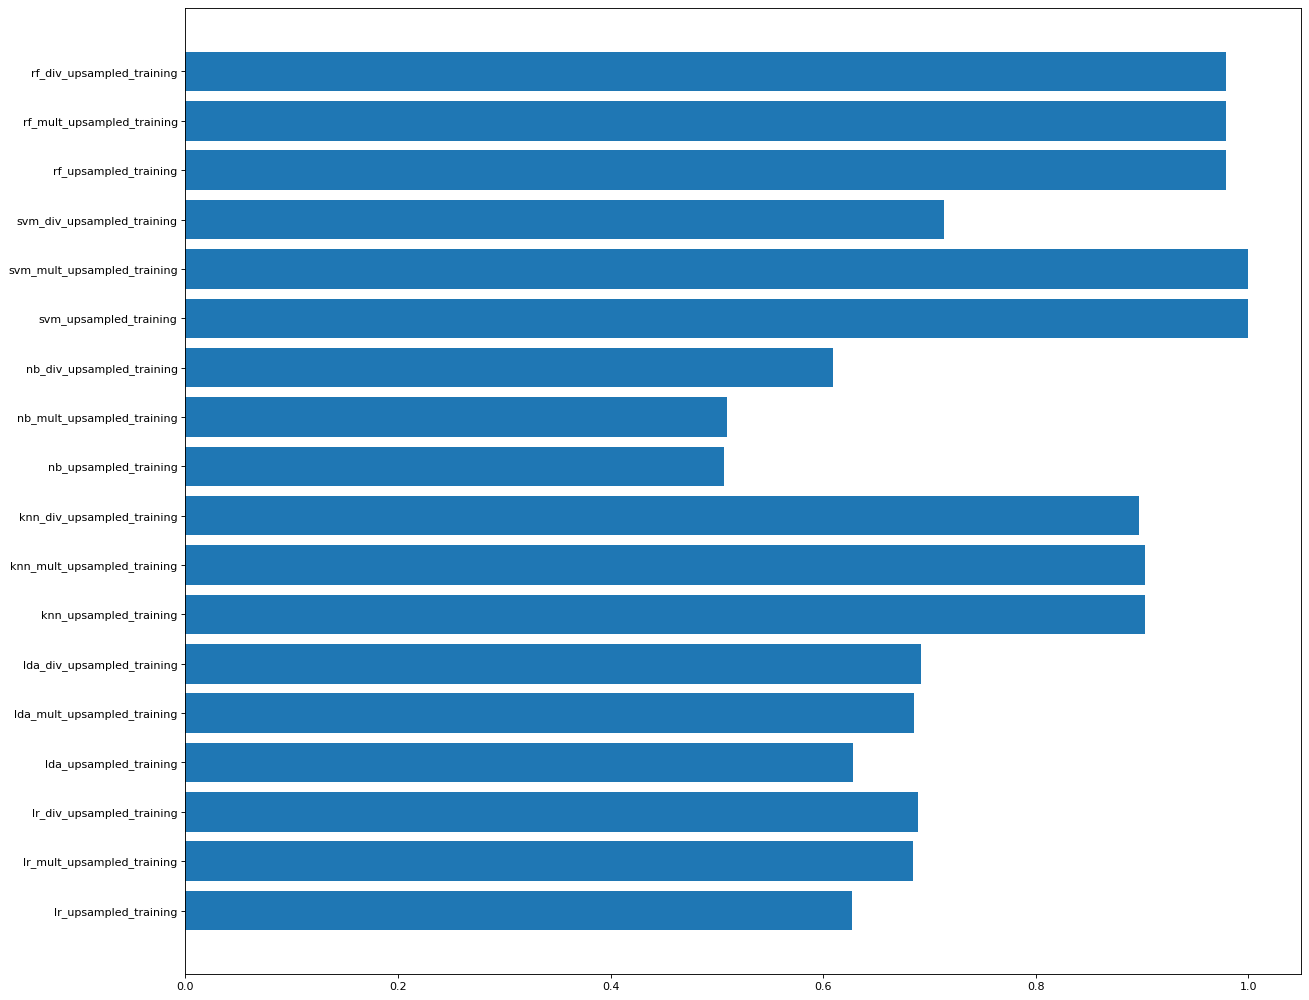

In [248]:
plt.figure(figsize=(18, 16), dpi= 80)
plt.barh(y = range(len(upsampled_names)), width = upsampled_mean_accuracy)
plt.yticks(range(len(upsampled_names)), upsampled_names)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

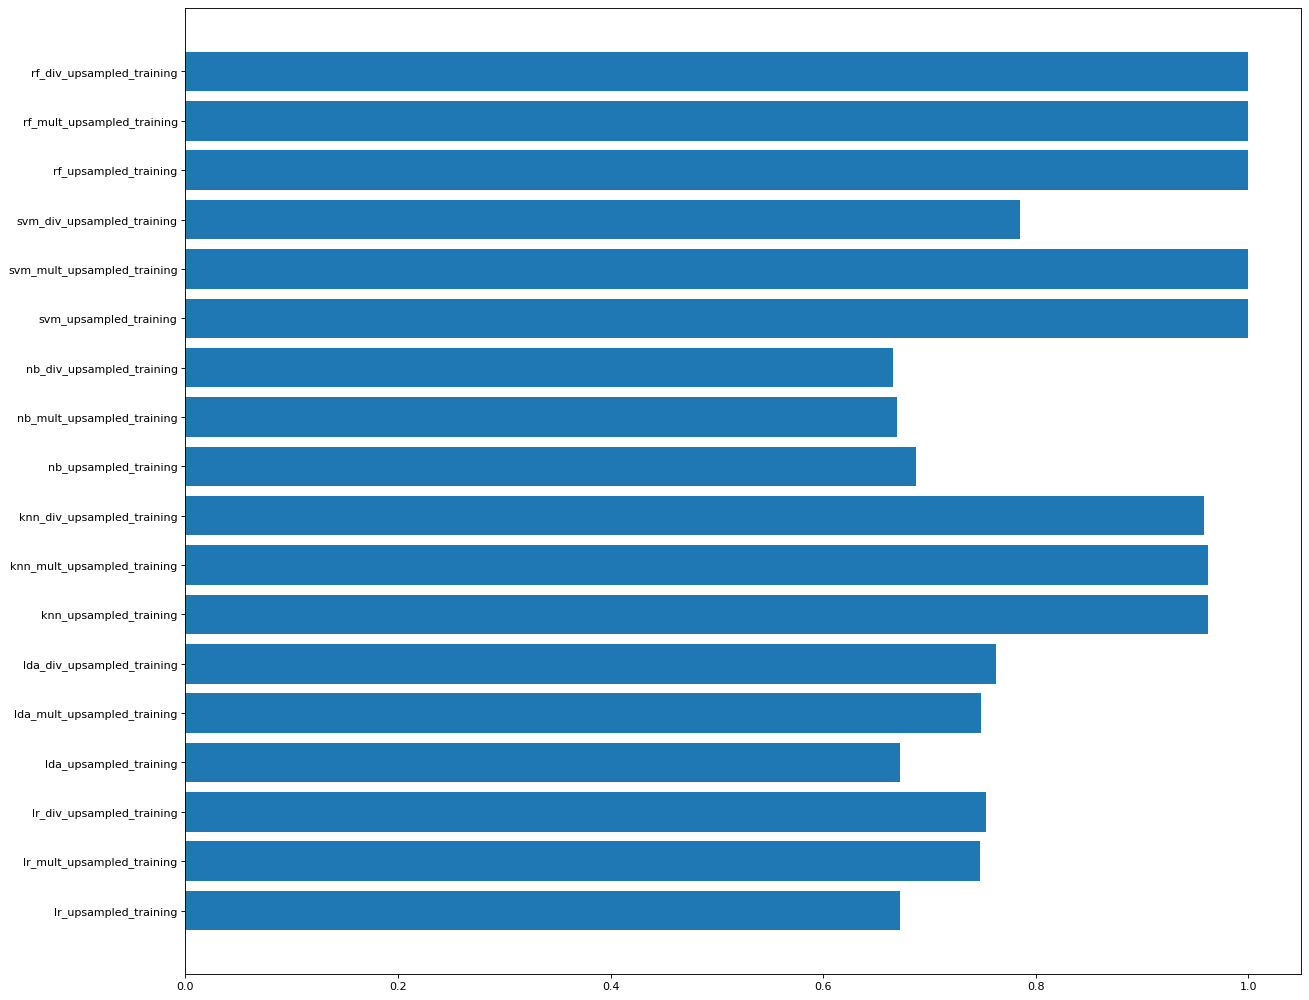

In [249]:
plt.figure(figsize=(18, 16), dpi= 80)
plt.barh(y = range(len(upsampled_names)), width = upsampled_mean_roc)
plt.yticks(range(len(upsampled_names)), upsampled_names)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

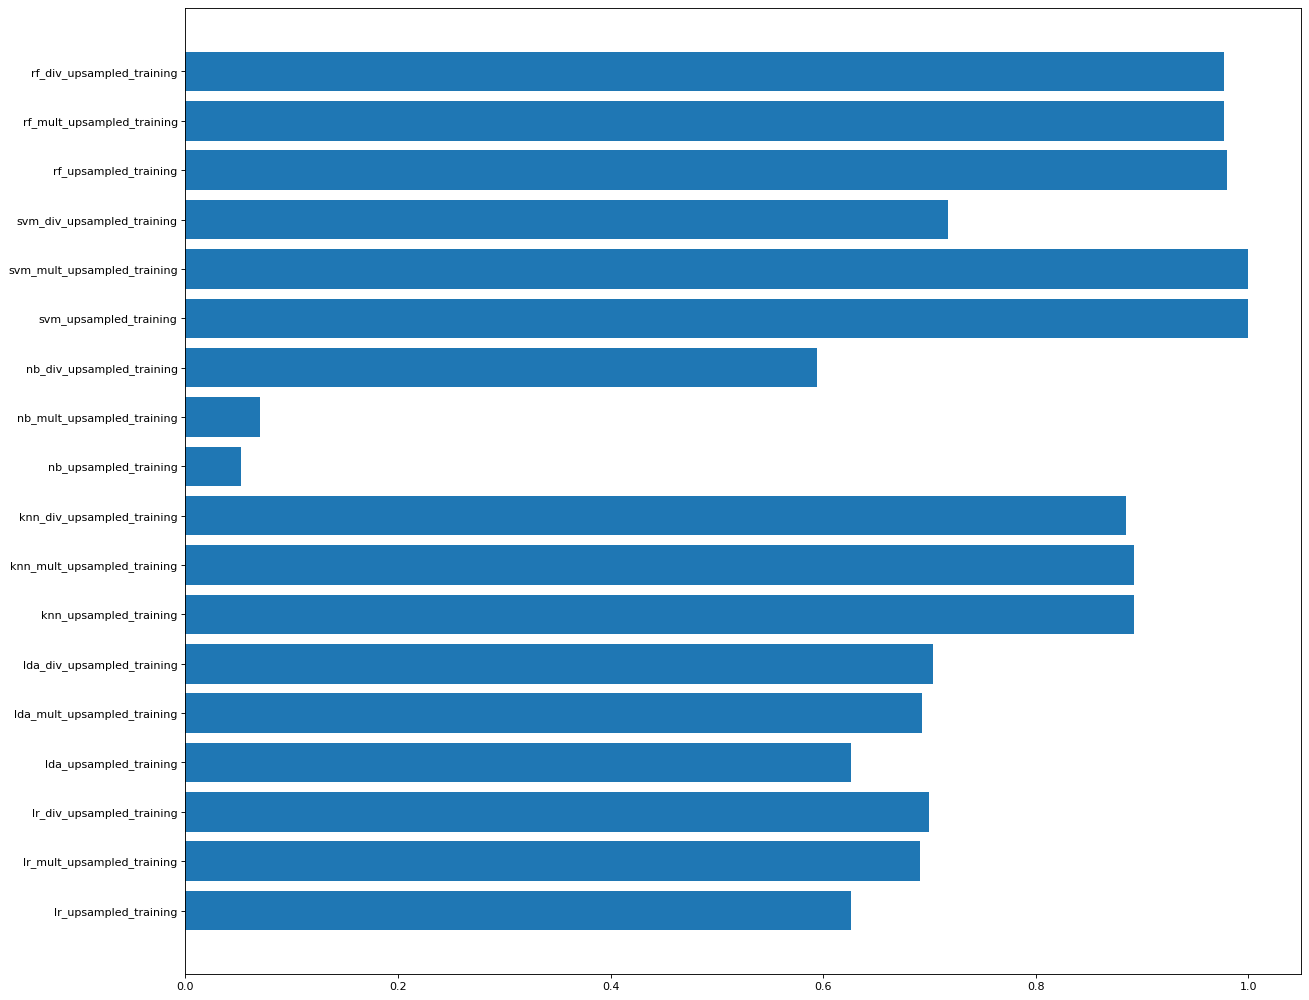

In [250]:
plt.figure(figsize=(18, 16), dpi= 80)
plt.barh(y = range(len(upsampled_names)), width = upsampled_mean_f1)
plt.yticks(range(len(upsampled_names)), upsampled_names)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

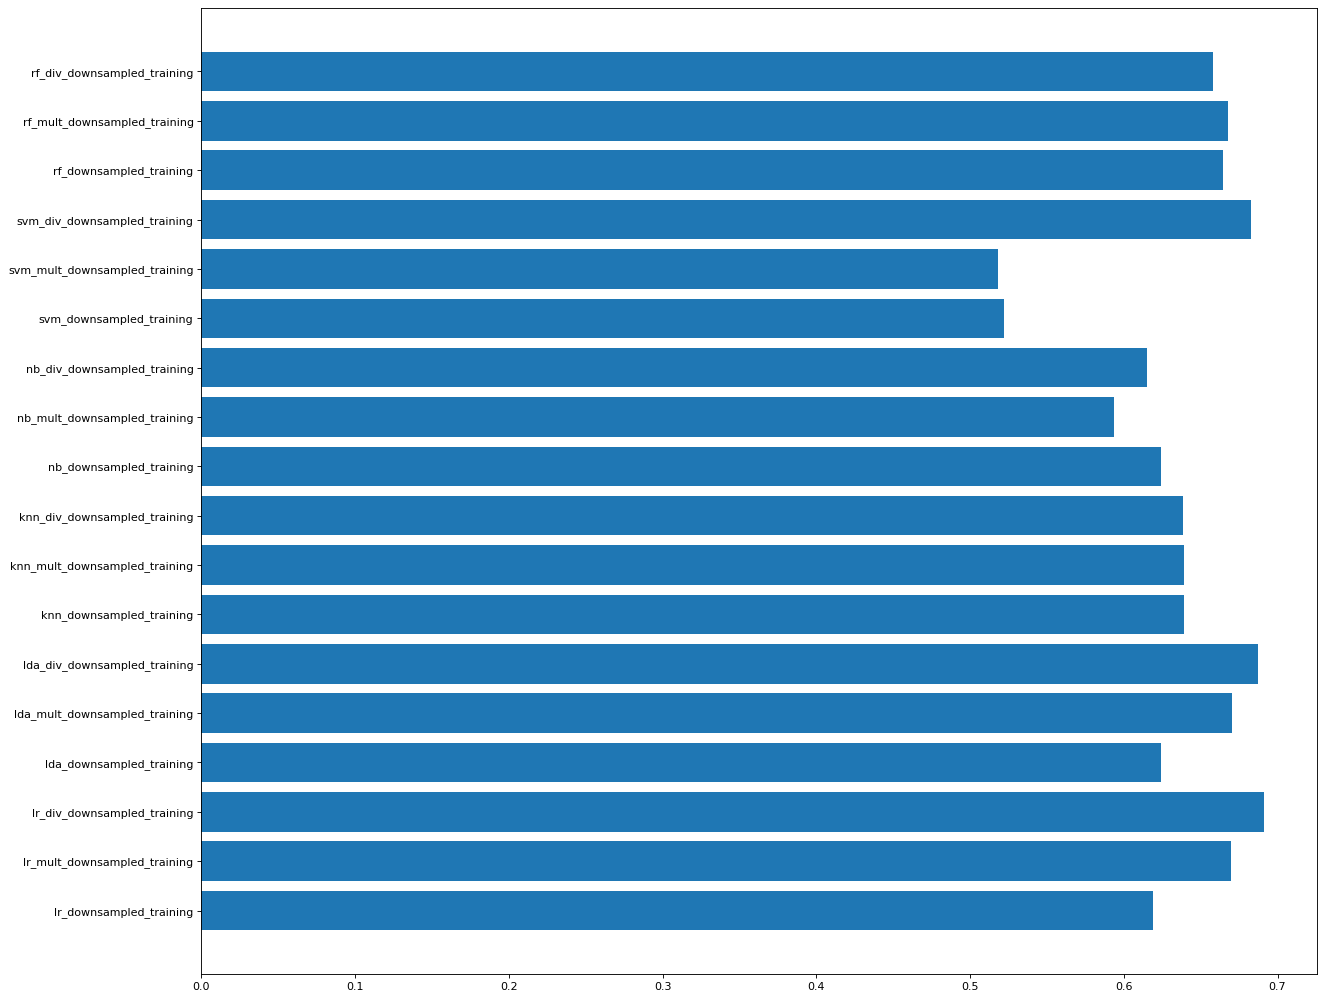

In [251]:
plt.figure(figsize=(18, 16), dpi= 80)
plt.barh(y = range(len(downsampled_names)), width = downsampled_mean_accuracy)
plt.yticks(range(len(downsampled_names)), downsampled_names)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

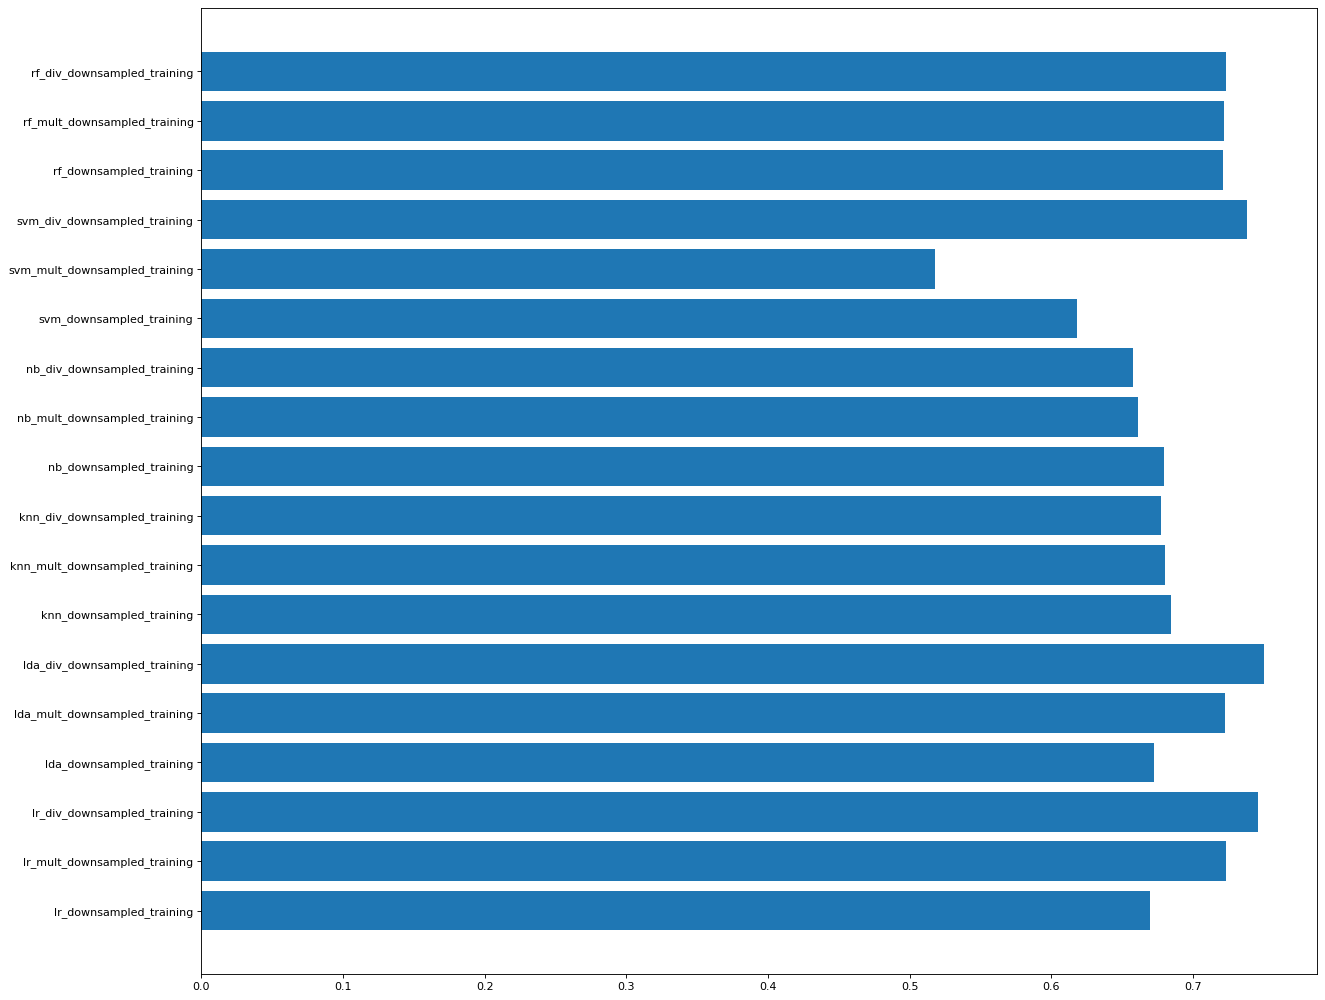

In [252]:
plt.figure(figsize=(18, 16), dpi= 80)
plt.barh(y = range(len(downsampled_names)), width = downsampled_mean_roc)
plt.yticks(range(len(downsampled_names)), downsampled_names)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

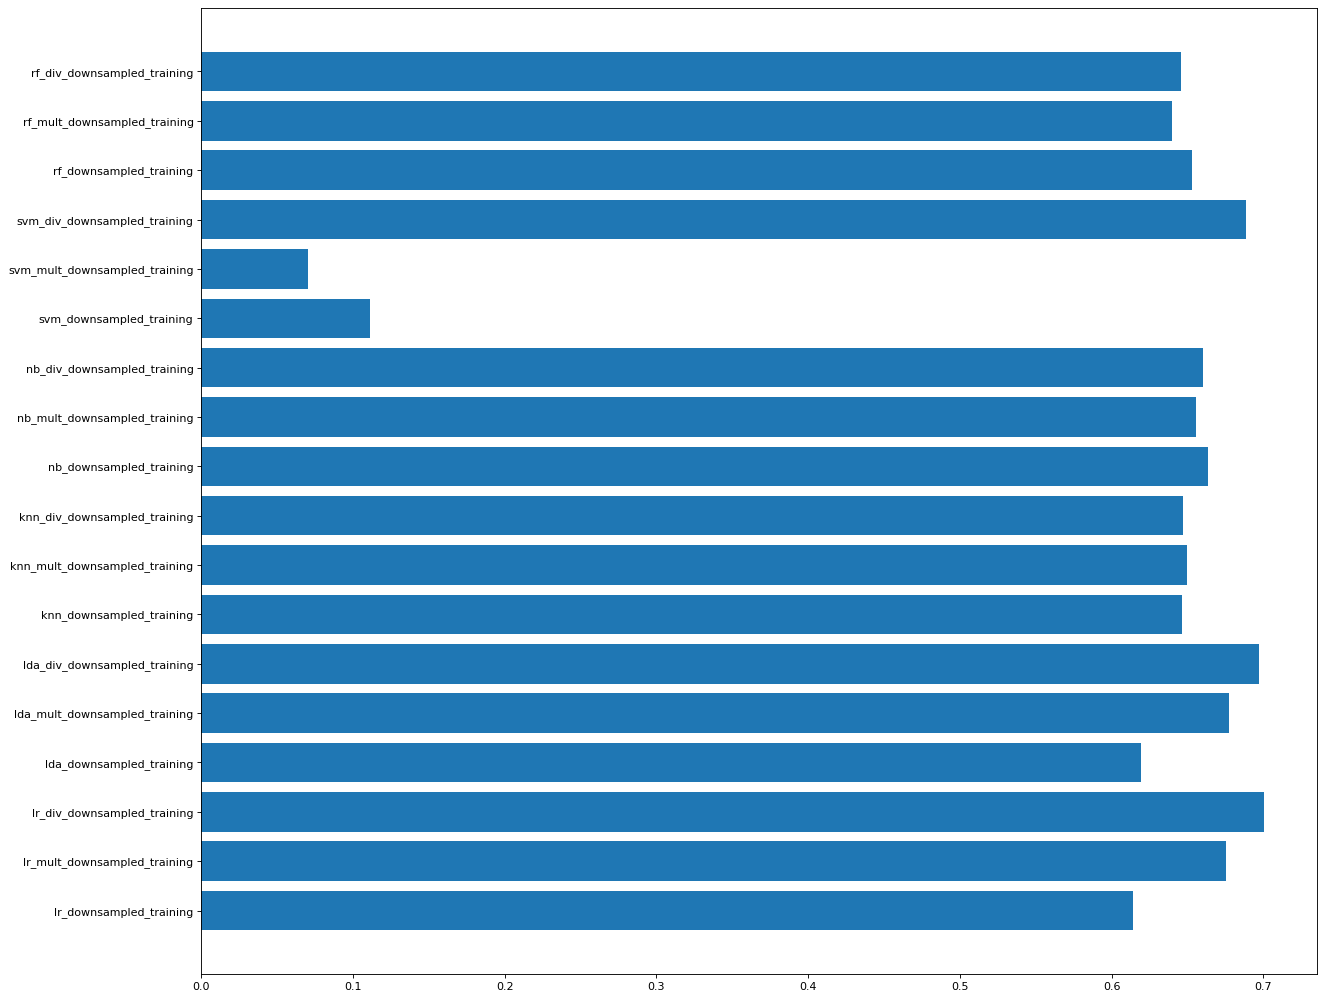

In [253]:
plt.figure(figsize=(18, 16), dpi= 80)
plt.barh(y = range(len(downsampled_names)), width = downsampled_mean_f1)
plt.yticks(range(len(downsampled_names)), downsampled_names)
plt.show